In [1]:
import os
# running from Root directory
os.chdir("..")

In [2]:
from motif_search_main import load_network_from_args
from utils.export_import import import_results
from utils.logs import log_motif_criteria_args, log_motif_results, log_sub_graph_args, log_randomizer_args, log_motifs_table
from utils.types import MotifCriteriaArgs, MotifType, MotifName, Motif
import matplotlib.pyplot as plt
import networkx as nx
from typing import Union
import numpy as np
from collections import defaultdict
import collections
from networkx.algorithms import isomorphism
from subgraphs.sub_graphs_utils import get_sub_graph_mapping_to_motif, generate_isomorphic_k_sub_graphs, create_base_motif


In [3]:
k = 3
isomorphic_mapping, isomorphic_graphs = generate_isomorphic_k_sub_graphs(k=k)
motifs = []
for sub_id in isomorphic_graphs:
    motifs.append(create_base_motif(sub_id, k))


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:00<00:00, 14422.13it/s]


In [4]:
def draw_motif(motif: Motif, ax):
    ax.axis('off')
    
    title = f'{motif.name.value}-{motif.id}' if motif.name.value != MotifName.na else motif.id
    ax.set_title(title, fontsize=7.5)

    graph = nx.DiGraph(motif.role_pattern)
    pos = nx.circular_layout(graph)
    nx.draw_networkx(graph, pos, ax=ax)
    
    if motif.polarity:
        for role, pol in zip(motif.role_pattern, motif.polarity):
            s,t = role
            graph[s][t]['polarity'] = 'c' if pol == 'complex' else pol

        edge_labels=dict([((u,v,),d['polarity']) for u,v,d in graph.edges(data=True)])
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax, font_color='k', font_weight='bold', label_pos=0.3)

In [5]:
a=list

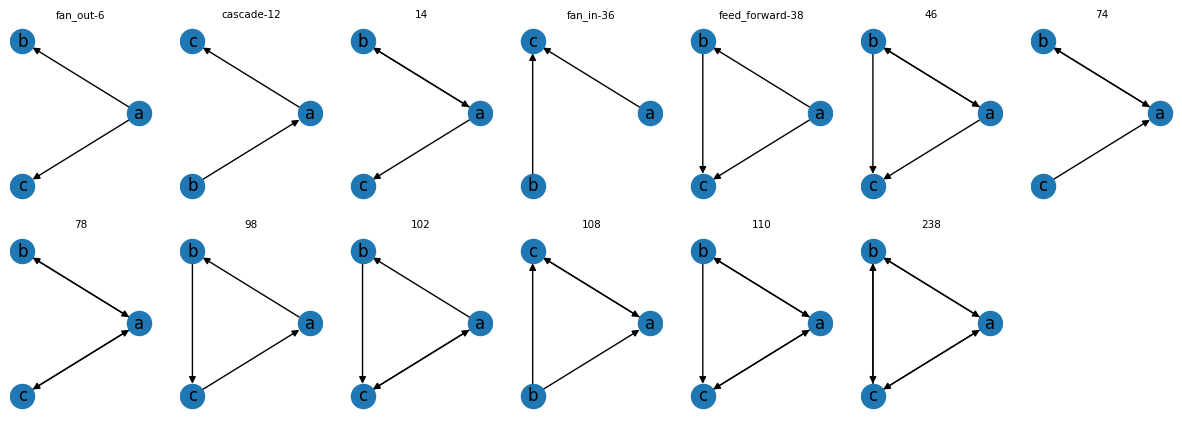

In [7]:
num_of_graphs = 13
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(15, 5))

for idx, motif in enumerate(motifs[:14]):  
    col = idx % 7
    row = 1 if idx / 7 >= 1 else 0
    draw_motif(motif, ax[row][col])
ax[-1][-1].remove()

In [16]:
isomorphic_graphs

{6: [6, 40, 192],
 12: [12, 34, 66, 96, 132, 136],
 14: [14, 42, 70, 168, 196, 224],
 36: [36, 72, 130],
 38: [38, 44, 104, 134, 194, 200],
 46: [46, 198, 232],
 74: [74, 76, 100, 138, 162, 164],
 78: [78, 170, 228],
 98: [98, 140],
 102: [102, 106, 142, 172, 204, 226],
 108: [108, 166, 202],
 110: [110, 174, 206, 230, 234, 236],
 238: [238]}

In [22]:
create_base_motif(44, 3)

Motif(name=<MotifName.feed_forward: 'feed_forward'>, id=44, adj_mat=array([[0, 0, 1],
       [1, 0, 1],
       [0, 0, 0]], dtype=int32), role_pattern=[('a', 'c'), ('b', 'a'), ('b', 'c')], n_real=0, motif_criteria=None, random_network_samples=[], sub_graphs=[], node_roles={}, node_appearances={}, polarity_motifs=[], polarity=[])

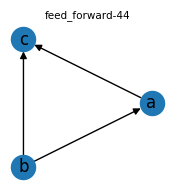

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2))
draw_motif(create_base_motif(44, 3), ax)
